In [50]:
from citipy import citipy
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import time module
import time


In [51]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [52]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [53]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [54]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-76.9214816356018 88.84719946867216
31.29612420862759 -146.58011836845031
-76.34107829001312 157.0069619300162
70.67723936103613 -147.816175521197
80.6619990681998 -41.570841631480334
-88.5791162047351 -51.47351265538455
-39.689360607082214 -153.0549494882191
89.53785423284745 -151.40207666517014
5.558436832193394 136.962946640423
-74.08079456899831 115.35748107235861
-50.80180667829172 -148.4703800569596
-16.8550205636123 -148.17219513805176
39.31712997436108 125.02995575283364
41.71596139562118 -70.79754533498078
81.63869225197172 -143.62899748465946
75.03060719272361 -60.82405394045354
-21.80789444803024 -127.55280398931362
-30.04211877744379 147.60577468146596
-10.3855179807274 -81.73640211552865
72.23414576175043 -163.34313818160174
-8.471089176322451 -165.15391319331906
-51.26133212655639 -117.17646211729092
10.969502148223313 163.86580075037017
84.20869452212818 30.83535914089134
-29.32131239582771 -35.62011577916826
69.2126863718488 -31.024317323160716
29.909374633291947 -95.32

In [55]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [56]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

## Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | kahului
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | tautira
Processing Record 12 of Set 1 | dandong
Processing Record 13 of Set 1 | wareham
Processing Record 14 of Set 1 | aklavik
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | narrabri
Processing Record 18 of Set 1 | chimbote
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | berlevag
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of Set 

In [57]:
len(city_data)

572

In [58]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,56.21,73,96,8.59,AU,2022-07-16 23:21:13
1,Kahului,20.8947,-156.4700,86.02,70,40,27.63,US,2022-07-16 23:21:13
2,Bluff,-46.6000,168.3333,48.79,75,100,17.22,NZ,2022-07-16 23:21:14
3,College,64.8569,-147.8028,66.07,71,75,3.44,US,2022-07-16 23:18:43
4,Ilulissat,69.2167,-51.1000,50.02,53,57,6.91,GL,2022-07-16 23:21:14
5,Ushuaia,-54.8000,-68.3000,40.66,60,20,5.75,AR,2022-07-16 23:18:26
6,Mataura,-46.1927,168.8643,48.47,76,100,3.76,NZ,2022-07-16 23:21:15
7,Barrow,71.2906,-156.7887,44.62,76,100,10.36,US,2022-07-16 23:21:15
8,Airai,-8.9266,125.4092,57.13,87,79,4.07,TL,2022-07-16 23:21:16
9,Albany,42.6001,-73.9662,80.78,52,100,1.01,US,2022-07-16 23:16:19


In [59]:
city_data_df = city_data_df.reindex(columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ])
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-07-16 23:21:13,-33.6500,115.3333,56.21,73,96,8.59
1,Kahului,US,2022-07-16 23:21:13,20.8947,-156.4700,86.02,70,40,27.63
2,Bluff,NZ,2022-07-16 23:21:14,-46.6000,168.3333,48.79,75,100,17.22
3,College,US,2022-07-16 23:18:43,64.8569,-147.8028,66.07,71,75,3.44
4,Ilulissat,GL,2022-07-16 23:21:14,69.2167,-51.1000,50.02,53,57,6.91
...,...,...,...,...,...,...,...,...,...
567,Vila Franca Do Campo,PT,2022-07-16 23:36:33,37.7167,-25.4333,73.20,92,7,6.49
568,Tecoanapa,MX,2022-07-16 23:34:44,16.5167,-98.7500,80.96,84,100,7.70
569,Ferrol,ES,2022-07-16 23:36:33,43.4832,-8.2369,63.12,97,91,4.68
570,Inta,RU,2022-07-16 23:36:33,66.0317,60.1659,62.40,80,93,10.83


In [62]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [63]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

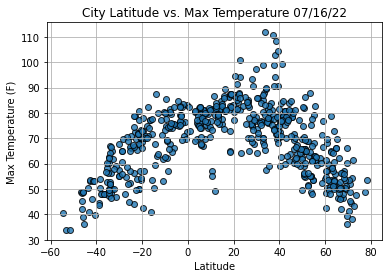

In [64]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

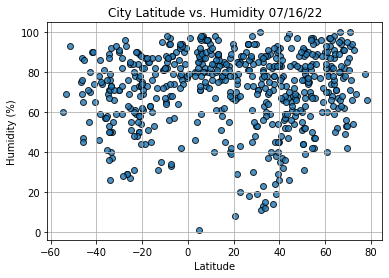

In [65]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

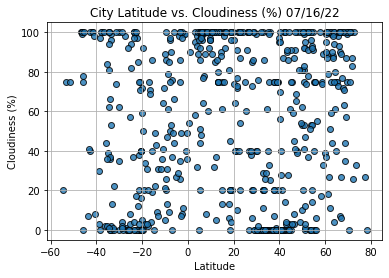

In [66]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

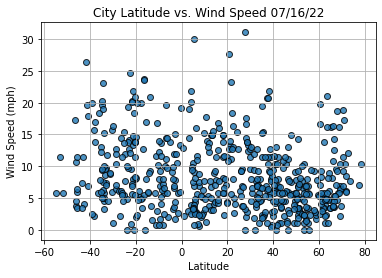

In [67]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()